pip freeze > requirements.txt

In [20]:
pip install -r requirements.txt 

  Obtaining dependency information for appier from https://files.pythonhosted.org/packages/7a/d2/c128d4f9a022de4205b88104584bba697ba4e15d8e5732021267b84080d6/appier-1.31.2-py2.py3-none-any.whl.metadata
   ---------------------------------------- 0.0/292.6 kB ? eta -:--:--
   ----- ---------------------------------- 41.0/292.6 kB 2.0 MB/s eta 0:00:01
   --------------- ------------------------ 112.6/292.6 kB 1.1 MB/s eta 0:00:01
   --------------- ------------------------ 112.6/292.6 kB 1.1 MB/s eta 0:00:01
   --------------------- ---------------- 163.8/292.6 kB 821.4 kB/s eta 0:00:01
   ------------------------- ------------ 194.6/292.6 kB 908.0 kB/s eta 0:00:01
   --------------------------------- ---- 256.0/292.6 kB 874.6 kB/s eta 0:00:01
   --------------------------------- ---- 256.0/292.6 kB 874.6 kB/s eta 0:00:01
   -------------------------------------- 292.6/292.6 kB 786.5 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
import json
import facebook
import requests
import numpy as np
import pandas as  pd
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from arabicstopwords.stopwords_lexicon import stopwords_lexicon 
import arabicstopwords.arabicstopwords as stp
import pyarabic.arabrepr
from tashaphyne.stemming import ArabicLightStemmer
import re


In [2]:
spark = SparkSession\
        .builder\
        .appName("facebook_Data")\
        .getOrCreate()
spark   
      

        .master("local")\
        .config("spark.yarn.queue","prod")\
        .config("hive.metastore.uris", "thrift://localhost:9084")\
        .config("spark.sql.warehouse.dir", "/user/hive/warehouse")\
        .config("spark.sql.catalogImplementation", "hive")\
        .enableHiveSupport()\

In [7]:
df_p=spark.read.csv('/30-Work/DataEngineer/01-Projects/03-ML/Facebook/01-posts.csv/')

Py4JJavaError: An error occurred while calling o53.csv.
: java.lang.UnsatisfiedLinkError: org.apache.hadoop.io.nativeio.NativeIO$Windows.access0(Ljava/lang/String;I)Z
	at org.apache.hadoop.io.nativeio.NativeIO$Windows.access0(Native Method)
	at org.apache.hadoop.io.nativeio.NativeIO$Windows.access(NativeIO.java:793)
	at org.apache.hadoop.fs.FileUtil.canRead(FileUtil.java:1249)
	at org.apache.hadoop.fs.FileUtil.list(FileUtil.java:1454)
	at org.apache.hadoop.fs.RawLocalFileSystem.listStatus(RawLocalFileSystem.java:601)
	at org.apache.hadoop.fs.FileSystem.listStatus(FileSystem.java:1972)
	at org.apache.hadoop.fs.FileSystem.listStatus(FileSystem.java:2014)
	at org.apache.hadoop.fs.ChecksumFileSystem.listStatus(ChecksumFileSystem.java:761)
	at org.apache.spark.util.HadoopFSUtils$.listLeafFiles(HadoopFSUtils.scala:225)
	at org.apache.spark.util.HadoopFSUtils$.$anonfun$parallelListLeafFilesInternal$1(HadoopFSUtils.scala:95)
	at scala.collection.TraversableLike.$anonfun$map$1(TraversableLike.scala:286)
	at scala.collection.mutable.ResizableArray.foreach(ResizableArray.scala:62)
	at scala.collection.mutable.ResizableArray.foreach$(ResizableArray.scala:55)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:49)
	at scala.collection.TraversableLike.map(TraversableLike.scala:286)
	at scala.collection.TraversableLike.map$(TraversableLike.scala:279)
	at scala.collection.AbstractTraversable.map(Traversable.scala:108)
	at org.apache.spark.util.HadoopFSUtils$.parallelListLeafFilesInternal(HadoopFSUtils.scala:85)
	at org.apache.spark.util.HadoopFSUtils$.parallelListLeafFiles(HadoopFSUtils.scala:69)
	at org.apache.spark.sql.execution.datasources.InMemoryFileIndex$.bulkListLeafFiles(InMemoryFileIndex.scala:162)
	at org.apache.spark.sql.execution.datasources.InMemoryFileIndex.listLeafFiles(InMemoryFileIndex.scala:133)
	at org.apache.spark.sql.execution.datasources.InMemoryFileIndex.refresh0(InMemoryFileIndex.scala:96)
	at org.apache.spark.sql.execution.datasources.InMemoryFileIndex.<init>(InMemoryFileIndex.scala:68)
	at org.apache.spark.sql.execution.datasources.DataSource.createInMemoryFileIndex(DataSource.scala:539)
	at org.apache.spark.sql.execution.datasources.DataSource.resolveRelation(DataSource.scala:405)
	at org.apache.spark.sql.DataFrameReader.loadV1Source(DataFrameReader.scala:229)
	at org.apache.spark.sql.DataFrameReader.$anonfun$load$2(DataFrameReader.scala:211)
	at scala.Option.getOrElse(Option.scala:189)
	at org.apache.spark.sql.DataFrameReader.load(DataFrameReader.scala:211)
	at org.apache.spark.sql.DataFrameReader.csv(DataFrameReader.scala:538)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(Unknown Source)
	at java.lang.reflect.Method.invoke(Unknown Source)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:374)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.lang.Thread.run(Unknown Source)


In [ ]:
df_p.show(truncate=False)
df_p.count()

In [125]:
df_c=spark.read.parquet('hdfs://localhost:9000/user/hive/lake/02-Comments_p.parquet')

In [121]:
df_c.show(truncate=False)
df_c.count()

+-------------------------------+--------------------------------+------------------------+-----------------------------------------------------------------------------------------------------------------------------------------+
|id                             |comments_id                     |comments_created_time   |comments_message                                                                                                                         |
+-------------------------------+--------------------------------+------------------------+-----------------------------------------------------------------------------------------------------------------------------------------+
|365304090334712_698770025625333|698770025625333_338325482002707 |2023-09-06T14:56:41+0000|بكام من فضلك                                                                                                                             |
|365304090334712_698770025625333|698770025625333_1320804668550741|2023-09-07T04:

19331

In [122]:
from pyspark.sql.functions import translate
from pyspark.sql import functions as F

In [ ]:
Flag={1:'سؤال عن السعر',2:'سؤال عن المقاس',3:'سؤال عن الصور',4:'تعليق إجابي',5:'تعليق سلبي',6:'سؤال عن المعرض',7:'سؤال عن مواعيد العمل'}

In [127]:
from pyspark.sql.functions import col,lit
#df_c.lit(0).alias('Flag')
df_c=df_c.withColumn('Flag',lit(0))
df_c.show()
#df.withColumn("CopiedColumn",col("salary")* -1).show()

+--------------------+--------------------+---------------------+--------------------+----+
|                  id|         comments_id|comments_created_time|    comments_message|Flag|
+--------------------+--------------------+---------------------+--------------------+----+
|365304090334712_6...|698770025625333_3...| 2023-09-06T14:56:...|        بكام من فضلك|   0|
|365304090334712_6...|698770025625333_1...| 2023-09-07T04:28:...|        بكام لو سمحت|   0|
|365304090334712_6...|698770025625333_2...| 2023-09-02T13:38:...|بكام السفرة كاملة...|   0|
|365304090334712_6...|698770025625333_6...| 2023-09-04T01:36:...|                بكام|   0|
|365304090334712_6...|698770025625333_8...| 2023-09-01T14:17:...|سعر التربيزه والك...|   0|
|365304090334712_6...|698770025625333_3...| 2023-09-02T00:54:...|                بكام|   0|
|365304090334712_6...|698770025625333_6...| 2023-09-01T21:10:...|           كام السعر|   0|
|365304090334712_6...|698770025625333_5...| 2023-09-01T21:43:...|       السعر لو

In [137]:
wordDict={1:['كام','سعر'],2:['مقاس'],3:['كتالوج','صور']}
wordList=[]
for i in wordDict:
    wordList=wordDict[i]

    conditions = [F.col('comments_message').like(f'%{word}%') for word in wordList]
    combined_condition = conditions[0]
    for condition in conditions[1:]:
          combined_condition = combined_condition | condition 
    df_c = df_c.withColumn('Flag', F.when(combined_condition,i).otherwise(df_c.Flag))

df_c.show()

+--------------------+--------------------+---------------------+--------------------+----+
|                  id|         comments_id|comments_created_time|    comments_message|Flag|
+--------------------+--------------------+---------------------+--------------------+----+
|365304090334712_6...|698770025625333_3...| 2023-09-06T14:56:...|        بكام من فضلك|   1|
|365304090334712_6...|698770025625333_1...| 2023-09-07T04:28:...|        بكام لو سمحت|   1|
|365304090334712_6...|698770025625333_2...| 2023-09-02T13:38:...|بكام السفرة كاملة...|   1|
|365304090334712_6...|698770025625333_6...| 2023-09-04T01:36:...|                بكام|   1|
|365304090334712_6...|698770025625333_8...| 2023-09-01T14:17:...|سعر التربيزه والك...|   1|
|365304090334712_6...|698770025625333_3...| 2023-09-02T00:54:...|                بكام|   1|
|365304090334712_6...|698770025625333_6...| 2023-09-01T21:10:...|           كام السعر|   1|
|365304090334712_6...|698770025625333_5...| 2023-09-01T21:43:...|       السعر لو

In [138]:
df_c.where('Flag ==3').show()

+--------------------+--------------------+---------------------+--------------------+----+
|                  id|         comments_id|comments_created_time|    comments_message|Flag|
+--------------------+--------------------+---------------------+--------------------+----+
|365304090334712_6...|693585412810461_3...| 2023-08-25T17:26:...|ممكن صوره المكاتب...|   3|
|365304090334712_6...|693062392862763_3...| 2023-08-27T23:40:...|ممكن صور غرف نوم ...|   3|
|365304090334712_6...|685183350317334_1...| 2023-08-09T10:44:...|ممكن كتالوج لصور ...|   3|
|365304090334712_6...|685183350317334_3...| 2023-08-23T05:46:...|      ممكن صور للكنب|   3|
|365304090334712_6...|685183350317334_1...| 2023-08-26T12:53:...| ممكن كتالوج المكاتب|   3|
|365304090334712_6...|685183350317334_9...| 2023-08-08T12:58:...|الرجاء ارسال كتال...|   3|
|365304090334712_6...|685183350317334_2...| 2023-08-20T22:31:...|ممكن الكتالوج بال...|   3|
|365304090334712_6...|685183350317334_8...| 2023-08-19T22:48:...|ممكن كتالوج صور

In [35]:
combined_condition

Column<'(comments_message LIKE %كام% OR comments_message LIKE %سعر%)'>

In [23]:
df_c.show()

+--------------------+--------------------+---------------------+--------------------+----+
|                  id|         comments_id|comments_created_time|    comments_message|Flag|
+--------------------+--------------------+---------------------+--------------------+----+
|365304090334712_6...|698770025625333_3...| 2023-09-06T14:56:...|        بكام من فضلك|   0|
|365304090334712_6...|698770025625333_1...| 2023-09-07T04:28:...|        بكام لو سمحت|   0|
|365304090334712_6...|698770025625333_2...| 2023-09-02T13:38:...|بكام السفرة كاملة...|   0|
|365304090334712_6...|698770025625333_6...| 2023-09-04T01:36:...|                بكام|   0|
|365304090334712_6...|698770025625333_8...| 2023-09-01T14:17:...|سعر التربيزه والك...|   0|
|365304090334712_6...|698770025625333_3...| 2023-09-02T00:54:...|                بكام|   0|
|365304090334712_6...|698770025625333_6...| 2023-09-01T21:10:...|           كام السعر|   0|
|365304090334712_6...|698770025625333_5...| 2023-09-01T21:43:...|       السعر لو

In [31]:
#pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
pd.set_option('max_colwidth', None)
df=df_c.toPandas()
df

,id,comments_id,comments_created_time,comments_message,Flag
0,365304090334712_698770025625333,698770025625333_338325482002707,2023-09-06T14:56:41+0000,بكام من فضلك,1
1,365304090334712_698770025625333,698770025625333_1320804668550741,2023-09-07T04:28:43+0000,بكام لو سمحت,1
2,365304090334712_698770025625333,698770025625333_239727935224103,2023-09-02T13:38:29+0000,بكام السفرة كاملة\nولو الترابيزة لوحدها ب٦ كراسي كام \nولو ٨ كراسي كام,1
3,365304090334712_698770025625333,698770025625333_6564767036977506,2023-09-04T01:36:03+0000,بكام,1
4,365304090334712_698770025625333,698770025625333_843465190766784,2023-09-01T14:17:33+0000,سعر التربيزه والكرسي للوحدهم كام,1
...,...,...,...,...,...
19326,365304090334712_370002036531584,370002036531584_373741172824337,2015-05-05T21:54:55+0000,Gehad Abd El Kader,0
19327,365304090334712_365305580334563,365305580334563_371111833087271,2015-04-26T22:45:24+0000,اكيد انتوا عند حسن ظن الناس كلها بالتوفيق دايما,0
19328,365304090334712_365305580334563,365305580334563_371110566420731,2015-04-26T22:36:50+0000,انا جايبة جهازي كله من عندكم وهو تحفة بصراحة وبالذات غرفة الاطفال ربنا يوفقكم وفي تقدم ع طول بس بطلب انكم تنزلوا صور غرف نوم اكتر من صورة واحدة علشان لو واحد عايز يختار ولما فترة الخصومات تيجي بتاع كل سنة ياريت تعرفونا,0
19329,365304090334712_365305580334563,365305580334563_390195934512194,2015-06-20T10:57:26+0000,"Mffco furnature is the best, I prefer its production more than any other one ' '",0


In [8]:
comments_message=df_c.toPandas()
comments_message=comments_message['comments_message']
comments_message

0                                             بكام من فضلك
1                                             بكام لو سمحت
2        بكام السفرة كاملة\nولو الترابيزة لوحدها ب٦ كرا...
3                                                     بكام
4                         سعر التربيزه والكرسي للوحدهم كام
                               ...                        
19326                                   Gehad Abd El Kader
19327      اكيد انتوا عند حسن ظن الناس كلها بالتوفيق دايما
19328    انا جايبة جهازي كله من عندكم وهو تحفة بصراحة و...
19329    Mffco furnature is the best, I prefer its prod...
19330               عايزه اعرف السراير  من اي نوع من الخشب
Name: comments_message, Length: 19331, dtype: object

WordsText=''
for i in comments_message:
   WordsText = WordsText + " " + i
#824617

In [9]:
listText=[]
for i in comments_message:
   listText.append(i)

In [ ]:
listText 

In [42]:
len(listText)

19331

In [44]:
len(set(listText))

16394

print(type(listText),len(listText))
listText

blob=TextBlob(listText)
part_of_spech=blob.split()

help(blob)

type(part_of_spech)
part_of_spech

In [10]:
comments=df_c.toPandas()

/home/hadoop/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/hadoop/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


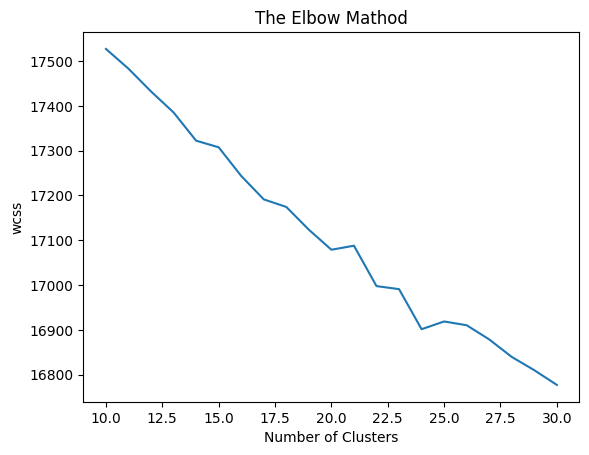

In [11]:
wcss=[]
# Convert text data to numerical vectors using TF-IDF
vectorizer = TfidfVectorizer()
data_vectors = vectorizer.fit_transform(listText)
for i in  range(11,31):
    Kmeans=KMeans(n_clusters=i,init='k-means++',random_state=45)
    Kmeans.fit(data_vectors)
    wcss.append(Kmeans.inertia_)

%matplotlib inline
plt.plot(range(11,31),wcss)
plt.title("The Elbow Mathod")
plt.xlabel("Number of Clusters")
plt.ylabel("wcss")
plt.show()

In [12]:
Kmeans=KMeans(n_clusters=4,init='k-means++',random_state=45)
yKmeans=Kmeans.fit_predict(data_vectors)

In [13]:
comments['Clustering']=yKmeans
comments.head(10)

,id,comments_id,comments_created_time,comments_message,Clustering
0,365304090334712_698770025625333,698770025625333_338325482002707,2023-09-06T14:56:41+0000,بكام من فضلك,3
1,365304090334712_698770025625333,698770025625333_1320804668550741,2023-09-07T04:28:43+0000,بكام لو سمحت,3
2,365304090334712_698770025625333,698770025625333_239727935224103,2023-09-02T13:38:29+0000,بكام السفرة كاملة\nولو الترابيزة لوحدها ب٦ كرا...,1
3,365304090334712_698770025625333,698770025625333_6564767036977506,2023-09-04T01:36:03+0000,بكام,3
4,365304090334712_698770025625333,698770025625333_843465190766784,2023-09-01T14:17:33+0000,سعر التربيزه والكرسي للوحدهم كام,1
5,365304090334712_698770025625333,698770025625333_309356931647422,2023-09-02T00:54:31+0000,بكام,3
6,365304090334712_698770025625333,698770025625333_699778765301568,2023-09-01T21:10:17+0000,كام السعر,0
7,365304090334712_698770025625333,698770025625333_567734928752789,2023-09-01T21:43:32+0000,السعر لو سمحت,0
8,365304090334712_698770025625333,698770025625333_856362579440097,2023-09-01T17:15:18+0000,السفره بكام,3
9,365304090334712_698770025625333,698770025625333_1458750181575705,2023-09-02T14:45:07+0000,بكام,3


In [14]:
comments.groupby(['Clustering'])['Clustering'].count()

Clustering
0      561
1    17203
2      901
3      666
Name: Clustering, dtype: int64

comments.to_csv('/home/hadoop/SparkProjects/Facebook/Clustering.csv',encoding='utf-8-sig')

from sklearn.metrics import silhouette_score

# Determine optimal number of clusters using silhouette analysis
silhouette_scores = []
cluster_range = range(2, 11)  # Try different numbers of clusters
for num_clusters in cluster_range:
    kmeans = KMeans(n_clusters=num_clusters, init='k-means++', random_state=45)
    cluster_labels = kmeans.fit_predict(data_vectors)
    silhouette_scores.append(silhouette_score(data_vectors, cluster_labels))

# Plot silhouette scores to identify optimal number of clusters
plt.plot(cluster_range, silhouette_scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score
import numpy as np

# Convert sparse matrix to dense numpy array
data_vectors_dense = data_vectors.toarray()

# Evaluate clustering results using Calinski-Harabasz index and Davies-Bouldin index
ch_score = calinski_harabasz_score(data_vectors_dense, yKmeans)
db_score = davies_bouldin_score(data_vectors_dense, yKmeans)

print("Calinski-Harabasz Index:", ch_score)
print("Davies-Bouldin Index:", db_score)


#Higher Calinski-Harabasz scores indicate better-defined clusters, while lower Davies-Bouldin scores indicate more separation between clusters.

In [39]:
Flag={1:'سؤال عن السعر',2:'سؤال عن المقاس',3:'سؤال عن الصور',4:'تعليق إجابي',5:'تعليق سلبي',6:'سؤال عن المعرض',7:'سؤال عن مواعيد العمل'}

In [40]:
Flag

{1: 'سؤال عن السعر',
 2: 'سؤال عن المقاس',
 3: 'سؤال عن الصور',
 4: 'تعليق إجابي',
 5: 'تعليق سلبي',
 6: 'سؤال عن المعرض',
 7: 'سؤال عن مواعيد العمل'}

pip install Tashaphyne
pip install Arabic-Stopwords

In [15]:
lexicon = stopwords_lexicon()
lexicon.get_categories()


['حرف', 'ضمير', 'فعل', 'اسم', 'اسم فعل', 'حرف ابجدي']

In [16]:

ArListem = ArabicLightStemmer()


In [17]:
corpus=[]
for i in range(1,len(listText)):
    review=re.sub('[^ء-ي]', ' ' , listText[i] ) 
    review=review.split()
    review= [x for x in review  if not x in stp.stop_stem(x)]
    review=' '.join(review)
    corpus.append(review)
corpus


['بكام سمحت',
 'بكام السفرة كاملة ولو الترابيزة لوحدها كراسي كام ولو كراسي كام',
 'بكام',
 'سعر التربيزه والكرسي للوحدهم كام',
 'بكام',
 'كام السعر',
 'السعر سمحت',
 'السفره بكام',
 'بكام',
 'السعر كام',
 'بالتفصيل سمحت سعر قطعة',
 'شغلهم جامد وكل قطعه ليها تمن ممكن تاخدها اولا مساحتك والمودىلات كتيره احسن الشركات اللي بنتعامل معاها انا وعيلتي كلها لىامانه',
 'السعر',
 'بكام',
 'بكام',
 'سعر',
 'بكام سمحت',
 'ترابيزه كراسي بكام',
 'ممكن السعر',
 'كام السعر',
 'السعر',
 '',
 'السعر',
 'ممكن سعر السفرة كراسي فقط نيش او بوفيه',
 'بكام فضلك مقاس وايه نوعها',
 'بكام',
 'بكام مرتبة',
 'سعرها مقاس سرير',
 'ممكن كراسي كافية ومطاعم',
 'بكام المرتبة ال',
 'الاسعار سمحت',
 'ممكن صوره المكاتب المتاحه والاسعار',
 'بكام مرتبه',
 'طريقة التقسيط ازاى سمحت',
 'السعر',
 'بكام ال سم',
 'سعر',
 'سعر كنبه سحاره فضلكم',
 'بكام',
 'عنوان مدينة نصر',
 'الاسعار كام',
 'بتشتغلوا الجمعه ولا اجازة',
 'مرتبة بكام والارتفاع ممكن تفاصيل',
 'السعر السعر',
 'بكام',
 'الاسعار كام',
 'سعر المرتبة',
 'بكام',
 'جيده مناسب

In [18]:
len(corpus)

19330

In [19]:
yText=comments['Clustering']
y=[]
for i in yText:
   y.append(i)

In [20]:
len(y)

19331

In [21]:
cv=CountVectorizer()
x=cv.fit_transform(corpus).toarray()
x = vectorizer.fit_transform(listText)



In [22]:
from sklearn.model_selection import train_test_split
x_trine,x_test,y_trine,y_test=train_test_split(x,y,test_size=.2,random_state=0)


In [23]:
np.shape(y_test)

(3867,)

In [24]:
np.shape(y_trine)

(15464,)

In [25]:
from sklearn.ensemble import  RandomForestClassifier
Classifier=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
Classifier.fit(x_trine,y_trine)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [26]:
y_pred=Classifier.predict(x_test)
len(y_pred)

3867

In [27]:
len(y_pred),len(y_test)

(3867, 3867)

In [28]:
comments['y_pred']=y_pred
comments.head(50)

ValueError: Length of values (3867) does not match length of index (19331)

In [29]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[ 121,    4,    0,    0],
       [   0, 3429,    0,    0],
       [   0,  107,   80,    0],
       [   0,    3,    0,  123]])

In [30]:
# Combine the test data and predicted labels into a DataFrame
df_results = pd.DataFrame({'Test Data': y_test, 'Predicted Label': y_pred})
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('max_colwidth', None)
# Print the DataFrame
df_results.head(50)

,Test Data,Predicted Label
0,1,1
1,0,0
2,1,1
3,1,1
4,1,1
5,1,1
6,1,1
7,1,1
8,1,1
9,1,1


stp.is_stop(review2[1])

review3= [[ArListem.light_stem(x)," --->root",ArListem.get_root() ] for x in review2  if not x in stp.stop_stem(x)]
review3 

repr(ArListem.get_affix_tuple())

ArListem.get_starword()

 ArListem.light_stem(review3[0])

tuples = lexicon.get_features_dict(review2[1])
tuples

lexicon.get_features_dict(review2[1])

len(stp.stopwords_list())

lexicon.get_by_category("اسم فعل", lemma=True, vocalized=True)